In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spam_df=pd.read_csv('emails.csv')

In [3]:
ham=spam_df[spam_df['spam']==0]

In [4]:
spam=spam_df[spam_df['spam']==1]

In [5]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [7]:
print('Spam Percentage =',(len(spam)/len(spam_df))*100,'%')

Spam Percentage = 23.88268156424581 %


In [8]:
print('Ham Percentage =',(len(ham)/len(spam_df))*100,'%')

Ham Percentage = 76.11731843575419 %


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(spam_df['text'])

In [10]:
spamham_countVectorizer.shape

(5728, 37303)

In [11]:
label=spam_df['spam']
X=spamham_countVectorizer
y=label

In [12]:
X.shape

(5728, 37303)

In [13]:
y.shape

(5728,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array([1, 0, 0, ..., 0, 0, 0])

In [19]:
cm=confusion_matrix(y_train,y_predict_train)

<Axes: >

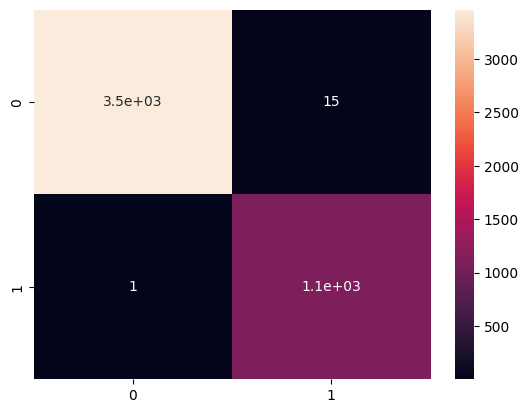

In [20]:
sns.heatmap(cm,annot=True)

In [21]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
cm=confusion_matrix(y_test,y_predict_test)

<Axes: >

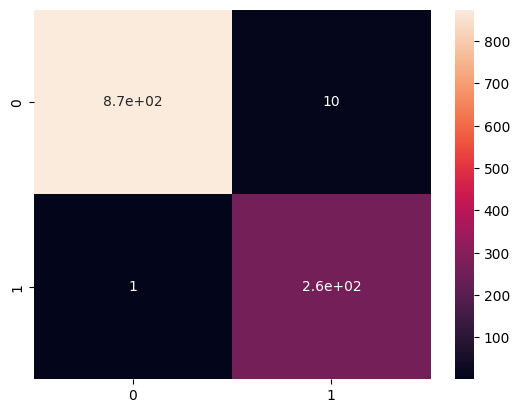

In [23]:
sns.heatmap(cm,annot=True)

In [24]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       884
           1       0.96      1.00      0.98       262

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

